In [1]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array
from sklearn.preprocessing import LabelBinarizer #데이터 전처리용
import tensorflow as tf
import numpy as np
from numpy import argmax
import os
import cv2 #이미지 읽기용
import matplotlib.pyplot as plt
from numpy import exp #Softmax출력용 

In [2]:
#얼굴 인식 라이브러리(파일) 삽입
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
face_coordinate = []

In [3]:
img = cv2.imread('Faces.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3,5)
count = 0 #반복 실행 시 덮어쓰도록 여기에 선언

for (x,y,w,h) in faces: #좌표 값과 rectangular의 width height를 받게 된다.
        # x,y값은 rectangular가 시작하는 지점의 좌표
        # x, y값은 좌표값 w,h는 얼굴 높이 너비
        # 원본 이미지에 얼굴의 위치를 표시하는 작업을 함.
        # for문을 돌리는 이유는 여러 개가 검출 될 수 있기 때문.
    face_coordinate_data = [x,y,w,h]
    face_coordinate.append(face_coordinate_data)
    print(face_coordinate[count])
    
    #image 좌표값대로 잘라서 따로 저장하는 부분
    img_trim = img[y:y + h,x:x + w]  # trim한 결과를 img_trim에 담는다
    cv2.imwrite('target_{}.jpg'.format(count),img_trim) #각 카운터에 맞는 이름으로 저장
    count = count + 1

    cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0),2) #얼굴에 사각형 프레임 씌우기
    cv2.imwrite('resultimage.jpg', img) #각 카운터에 맞는 이름으로 저장
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]

[394, 186, 521, 521]


In [4]:
img.shape

(850, 1280, 3)

In [5]:
#분석 준비
image_size=48
labels=['neutral', 'fear', 'happy', 'sad', 'angry', 'surprise']
analy_image=[]
img_count = 0

#데이터 전처리
for index in faces:
    image = cv2.imread("target_{}.jpg".format(img_count)) #이미지 읽기
    image = cv2.resize(image, (image_size,image_size)) #이미지 사이즈 편집
    image = img_to_array(image) #이미지 배열화
    print(image.shape)
    analy_image.append(image)
    img_count += 1

(48, 48, 3)


In [6]:
analy_image = np.array(analy_image, dtype="float32") / 255.0
labels = np.array(labels)
mlb = LabelBinarizer()
labels = mlb.fit_transform(labels)

In [7]:
model = keras.models.load_model('0530_adam_f32.h5')

In [8]:
image_predict = model.predict(analy_image) #사진 분석(개수 상관없음)

In [9]:
print_count = 0
result = []
image_predict = np.round(image_predict, 2)
for print_c in faces:
    neutral = image_predict[print_count][0]*100
    fear = image_predict[print_count][1]*100
    happy = image_predict[print_count][2]*100
    sad = image_predict[print_count][3]*100
    angry = image_predict[print_count][4]*100
    surprise = image_predict[print_count][5]*100
    resultStr = "[{}번째 사진] \n neutral:{:.1f}%\n fear:{:.1f}%\n happy:{:.1f}\n sad:{:.1f}%\n angry:{:.1f}%\n surprise:{:.1f}%\n\n".format(print_count+1,
                                                                                                                           neutral, fear,
                                                                                                                           happy, sad,
                                                                                                                           angry, surprise)
    result.append(resultStr)
    print("[{}번째 사진] \n neutral:{:.1f}%\n fear:{:.1f}%\n happy:{:.1f}%\n sad:{:.1f}%\n angry:{:.1f}%\n surprise:{:.1f}%\n\n".format(print_count+1,
                                                                                                                           neutral, fear,
                                                                                                                           happy, sad,
                                                                                                                           angry, surprise))
    print_count += 1
print_count = 0

[1번째 사진] 
 neutral:2.0%
 fear:0.0%
 happy:0.0%
 sad:97.0%
 angry:1.0%
 surprise:0.0%




# 사진 범위와 분석 결과 전달

In [12]:
import matplotlib.image as img

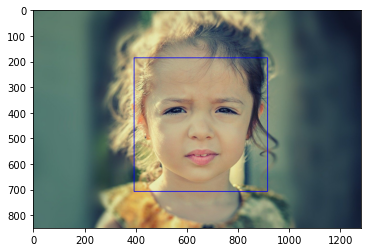

In [13]:
image = img.imread('resultimage.jpg')
plt.imshow(image)
plt.show()